<a href="https://colab.research.google.com/github/ankitk12029/Prediction-of-Social-Media-Addiction/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phase 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
print("Libraries Setup Complete")

Libraries Setup Complete


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Students Social Media Addiction.csv to Students Social Media Addiction (1).csv


In [ ]:
# Load Data
try:
  file_path = 'Students Social Media Addiction.csv'
  df = pd.read_csv(file_path)
  print("Data Loading Complete")
except Exception as e:
  print(f"Error loading data: {e}")


Data Loading Complete


In [ ]:
df.shape

(705, 13)

In [ ]:
print("=" * 50)
print("Initial data exploration")
print("=" * 50)

Initial data exploration


In [ ]:
# Initial data exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Dataset Shape: (705, 13)

First 5 rows:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score

In [ ]:
print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe().T)

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int

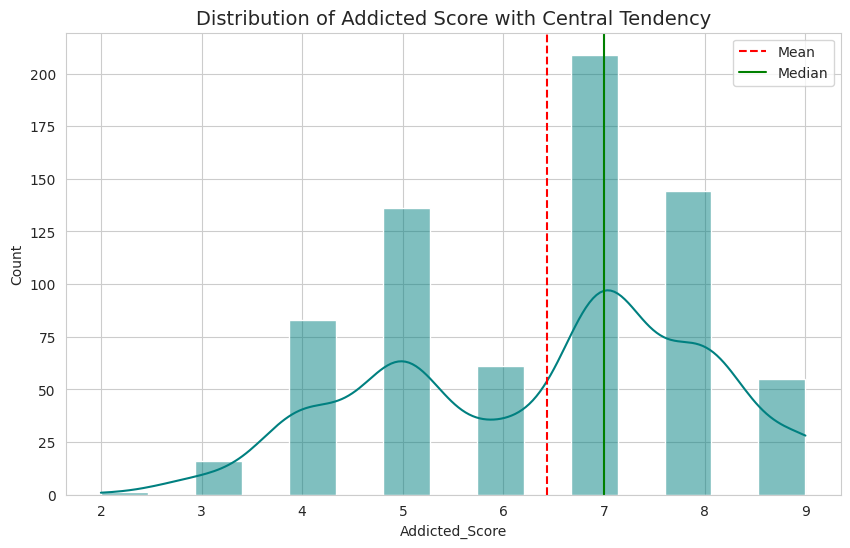

In [ ]:
# WHY THIS HELPS:
# Checks if the target is normally distributed (Gaussian).
# If highly skewed, we'd need Log/Box-Cox transformations to satisfy Linear Regression assumptions.

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Addicted_Score'], kde=True, color='teal', bins=15)
plt.axvline(df['Addicted_Score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['Addicted_Score'].median(), color='green', linestyle='-', label='Median')
plt.title('Distribution of Addicted Score with Central Tendency', fontsize=14)
plt.legend()
plt.show()

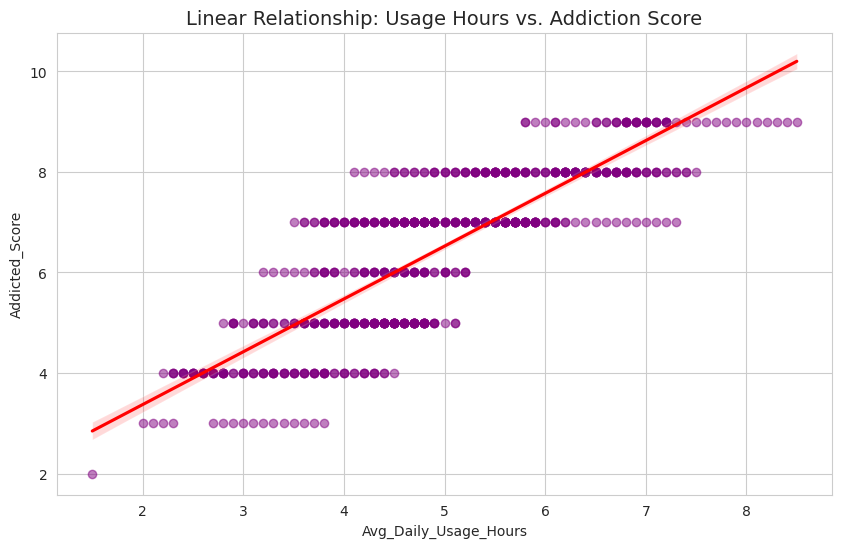

In [ ]:
# WHY THIS HELPS:
# Visualizes the "line of best fit" to confirm linearity between features and target.
# Tight clustering around the line indicates this feature is a strong predictor for the linear model.

plt.figure(figsize=(10, 6))
# regplot adds a linear regression line automatically
sns.regplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score',
            scatter_kws={'alpha':0.5, 'color':'purple'}, line_kws={'color':'red'})
plt.title('Linear Relationship: Usage Hours vs. Addiction Score', fontsize=14)
plt.show()

/tmp/ipython-input-3112421604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Mental_Health_Score', y='Addicted_Score', palette='viridis', inner="quartile")


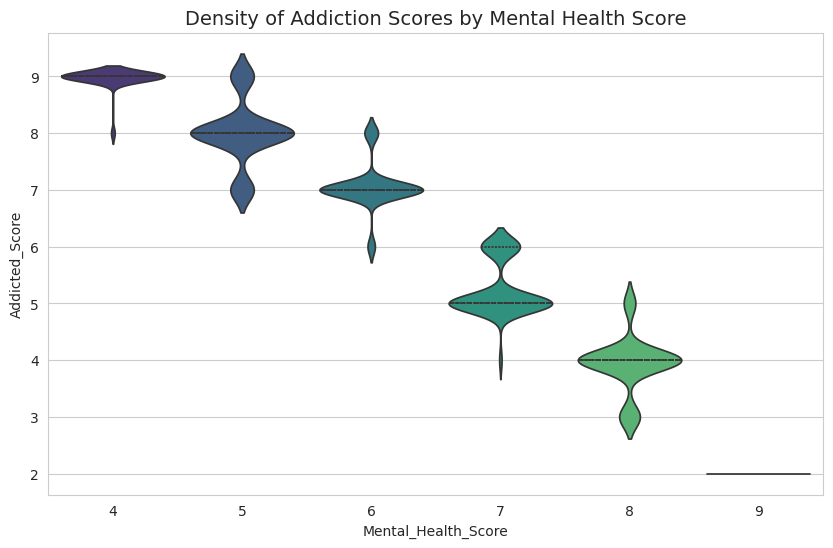

In [ ]:
# WHY THIS HELPS:
# Shows full distribution shape to reveal data "clusters" and check for consistent variance (homoscedasticity).
# This validates that error terms are consistent across different mental health scores (a key model assumption).

plt.figure(figsize=(10, 6))
# Violin plots show the probability density of the data at different values
sns.violinplot(data=df, x='Mental_Health_Score', y='Addicted_Score', palette='viridis', inner="quartile")
plt.title('Density of Addiction Scores by Mental Health Score', fontsize=14)
plt.show()

/tmp/ipython-input-2815336339.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='Academic_Level', y='Addicted_Score', order=order, palette='magma')


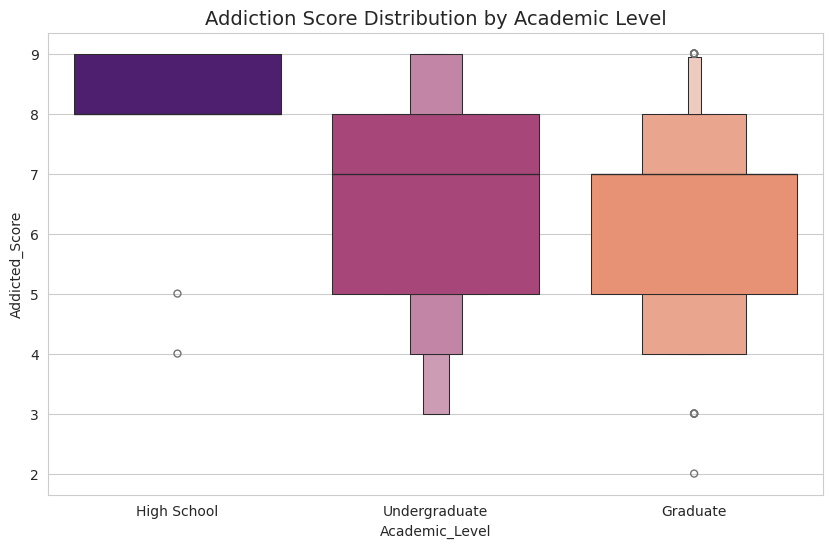

In [ ]:
# WHY THIS HELPS:
# Reveals ordinal trends (e.g., Grads > Undergrads), helping decide on encoding strategies.
# Since there is a clear order, we justify using Ordinal Encoding (0, 1, 2) instead of One-Hot Encoding.

plt.figure(figsize=(10, 6))
order = ['High School', 'Undergraduate', 'Graduate']
# Boxen plots are better for larger datasets as they show more quantiles
sns.boxenplot(data=df, x='Academic_Level', y='Addicted_Score', order=order, palette='magma')
plt.title('Addiction Score Distribution by Academic Level', fontsize=14)
plt.show()

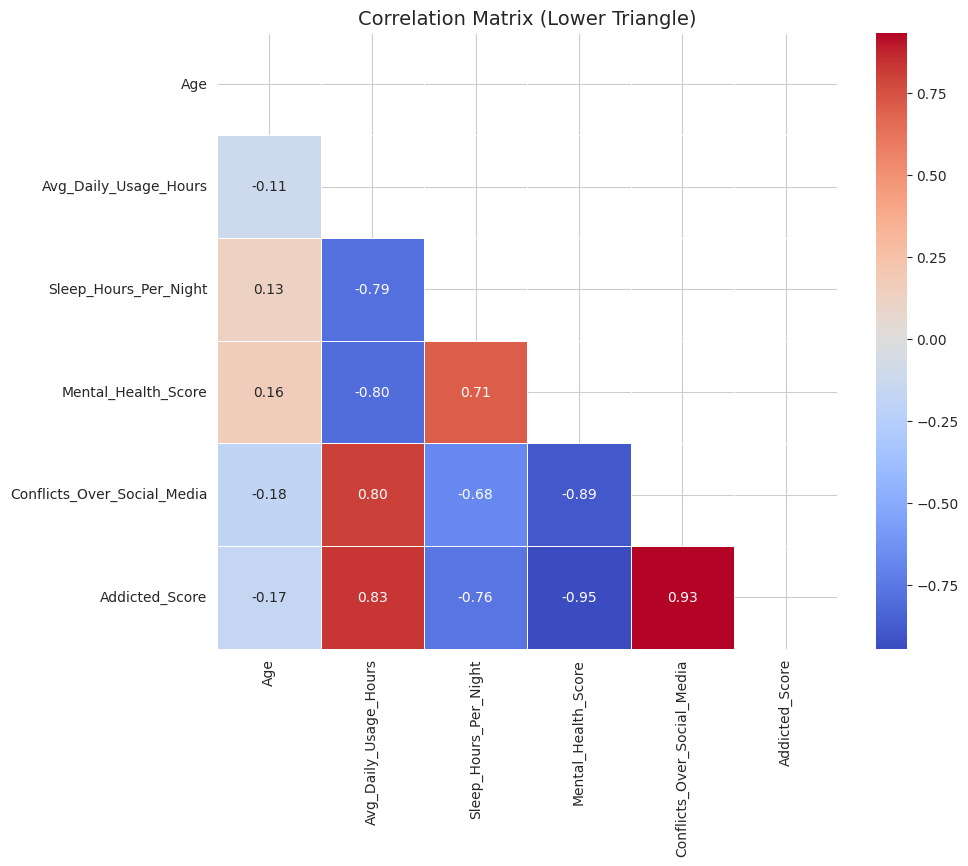

In [ ]:
# WHY THIS HELPS:
# Highlights "Multicollinearity" (independent features highly correlated with each other).
# If features conflict (e.g., Sleep vs. Mental Health), we may drop one to improve model stability.

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number']).drop(columns=['Student_ID'])
corr = numeric_df.corr()

# Create a mask to hide the upper triangle (redundant info)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle)', fontsize=14)
plt.show()

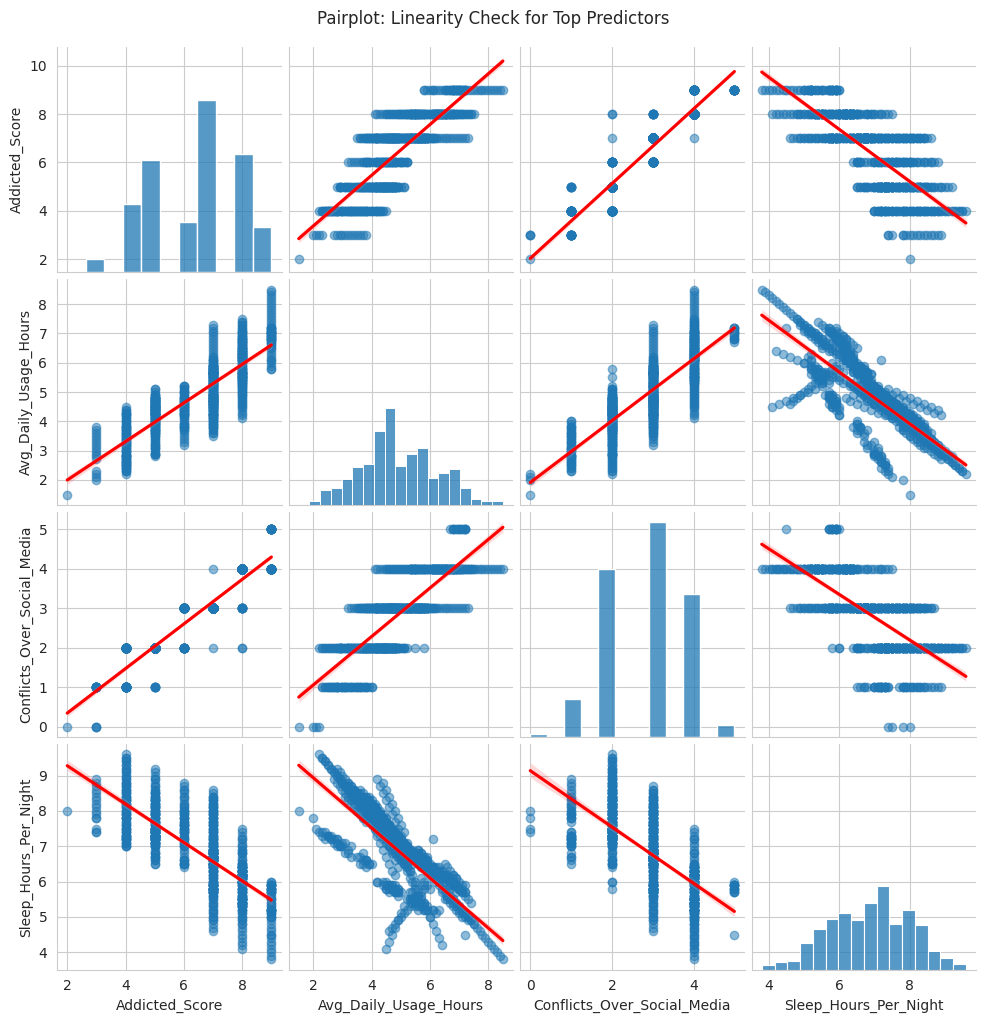

In [ ]:
# WHY THIS HELPS:
# Checks linearity for ALL strong predictors at once, not just Usage Hours.
# It confirms if 'Conflicts' and 'Sleep' (high correlation in heatmap) are also good candidates for the model.

cols_of_interest = ['Addicted_Score', 'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media', 'Sleep_Hours_Per_Night']
sns.pairplot(df[cols_of_interest], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.suptitle('Pairplot: Linearity Check for Top Predictors', y=1.02)
plt.show()

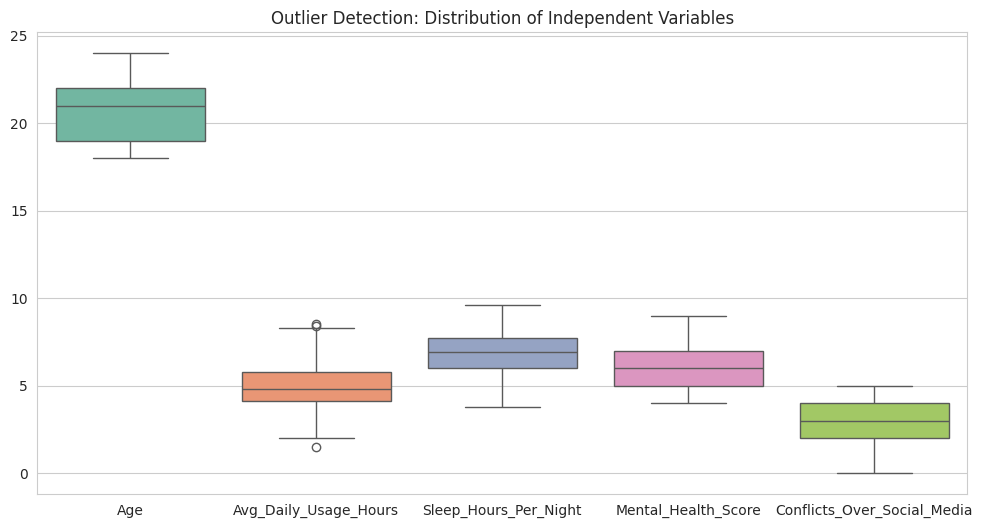

In [ ]:
# WHY THIS HELPS:
# Linear Regression is sensitive to outliers. This highlights any extreme values
# (dots outside the whiskers) that might skew prediction line and need removal.

plt.figure(figsize=(12, 6))
outlier_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']
sns.boxplot(data=df[outlier_cols], palette='Set2')
plt.title('Outlier Detection: Distribution of Independent Variables')
plt.show()

In [ ]:
print("=" * 50)
print("Data Cleaning")
print("=" * 50)


Data Cleaning


In [ ]:
# Copy to not make any permantent changes to master dataset
df_clean = df.copy()

In [ ]:
# Drop irrelevant ID
df_clean.drop(columns=['Student_ID'], inplace=True)

In [ ]:
# Manual Mapping (Ordinal & Binary)
# WHY IT HELPS: Converts text to numbers so the model can process them.
# Specifically for 'Academic_Level', this preserves the natural hierarchy (High School < Undergrad < Grad),
# allowing the model to understand that 'Graduate' is "higher" than 'High School'.
gender_map = {'Female': 0, 'Male': 1}
academic_map = {'High School': 0, 'Undergraduate': 1, 'Graduate': 2}
affects_map = {'No': 0, 'Yes': 1}

df_clean['Gender'] = df_clean['Gender'].map(gender_map)
df_clean['Academic_Level'] = df_clean['Academic_Level'].map(academic_map)
df_clean['Affects_Academic_Performance'] = df_clean['Affects_Academic_Performance'].map(affects_map)



In [ ]:
# Frequency Encoding for Country
# WHY IT HELPS: 'Country' has too many unique values (high cardinality).
# Creating a column for every country (One-Hot) would add 100+ columns, causing the "Curse of Dimensionality"
# (making the model slow and prone to overfitting). Frequency encoding keeps it as 1 efficient column.
country_counts = df_clean['Country'].value_counts(normalize=True)
df_clean['Country_Freq'] = df_clean['Country'].map(country_counts)
# df_clean.drop(columns=['Country'], inplace=True)
print(country_counts)


Country
India          0.075177
USA            0.056738
Canada         0.048227
France         0.038298
Mexico         0.038298
                 ...   
Oman           0.001418
Afghanistan    0.001418
Syria          0.001418
Yemen          0.001418
Bhutan         0.001418
Name: proportion, Length: 110, dtype: float64


In [ ]:
# One-Hot Encoding
# WHY IT HELPS: Converts nominal text data (no natural order) into binary columns.
# 'drop_first=True' prevents multicollinearity (dummy trap), vital for stable Linear Regression coefficients.
df_clean = pd.get_dummies(df_clean, columns=['Relationship_Status', 'Most_Used_Platform'],
                          prefix=['Rel', 'Platform'], drop_first=True, dtype=int)

# Feature Engineering
# WHY IT HELPS: Creates a new feature ('Sleep_Deficit') that measures the magnitude of a negative impact.
# This engineered feature is likely a stronger, more direct predictor of addiction than the raw 'Sleep_Hours_Per_Night'.
df_clean['Sleep_Deficit'] = (8 - df_clean['Sleep_Hours_Per_Night']).round(2)

In [ ]:
#(not sure if need it but still have added but commented out)
# # Scaling (Standardization)
# scaler = StandardScaler()

# # WHY IT HELPS: Ensures all features contribute equally by setting mean=0, std=1, crucial for stable model training.
# cols_to_scale = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
#                  'Mental_Health_Score', 'Conflicts_Over_Social_Media',
#                  'Sleep_Deficit', 'Country_Freq']
# df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

# # Reorder columns
# # WHY IT HELPS: Organizes data by placing the target ('Addicted_Score') at the end for easy model input/output splitting.
# cols = [c for c in df_clean.columns if c != 'Addicted_Score'] + ['Addicted_Score']
# df_clean = df_clean[cols]



In [ ]:
# Save final file
# WHY IT HELPS: Saves the final, model-ready, scaled dataset to a CSV file.
df_clean.to_csv('cleaned_social_media_addiction.csv', index=False)
files.download('cleaned_social_media_addiction.csv')
print("Data cleaning complete. File saved as 'cleaned_social_media_addiction.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data cleaning complete. File saved as 'cleaned_social_media_addiction.csv'


#Phase 2

In [ ]:
print("=" * 50)
print("PHASE 2: MACHINE LEARNING MODELING")
print("=" * 50)

PHASE 2: MACHINE LEARNING MODELING


In [ ]:
# PHASE 2: MACHINE LEARNING MODELING
#import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

In [ ]:
# ---------------------------------------------------------------
# 1. Load the Cleaned Dataset
# ---------------------------------------------------------------

df = pd.read_csv('/content/cleaned_social_media_addiction.csv')

# Target variable
target = "Addicted_Score"

# Features (all except target)
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# ---------------------------------------------------------------
# 2. Train/Test Split
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (564, 24)
Test size: (141, 24)


In [ ]:
df.dtypes #shows the column types to make sure they are all numerical for Linear regression


,0
Age,int64
Gender,int64
Academic_Level,int64
Country,object
Avg_Daily_Usage_Hours,float64
Affects_Academic_Performance,int64
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64
Conflicts_Over_Social_Media,int64
Addicted_Score,int64


In [ ]:
# ---------------------------------------------------------------
# Random Forest Regressor
# ---------------------------------------------------------------

# 1. Drop text column BEFORE splitting
df = df.drop(columns=['Country'])

# 2. Create features and target
X = df.drop(columns=['Addicted_Score'])
y = df['Addicted_Score']

# 3. Train/Test split AGAIN (this is the missing step!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Random Forest
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)

# 5. Predictions
rf_pred = rf.predict(X_test)

# 6. Metrics
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("\n--- Random Forest Performance ---")
print(f"R² Score: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"RMSE: {rf_rmse:.4f}")



--- Random Forest Performance ---
R² Score: 0.9836
MAE: 0.0725
RMSE: 0.2028


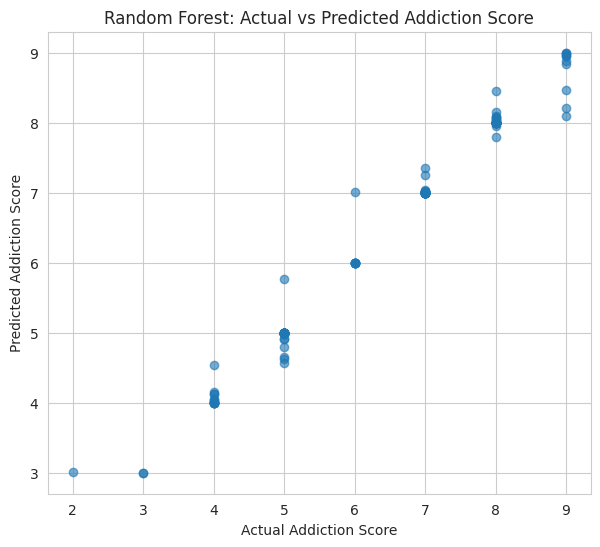

In [ ]:
# ---------------------------------------------------------------
# 6. Predicted vs Actual Plot
# ---------------------------------------------------------------

plt.figure(figsize=(7, 6))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Actual Addiction Score")
plt.ylabel("Predicted Addiction Score")
plt.title("Random Forest: Actual vs Predicted Addiction Score")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# ---------------------------------------------------------------
# 3. BASELINE MODEL — Linear Regression
# ---------------------------------------------------------------

# Use the 'df' DataFrame which has already been prepared (Student_ID dropped,
# categorical features encoded, Country column dropped in previous steps).

# Create features and target
X = df.drop(columns=['Addicted_Score'])
y = df['Addicted_Score']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 5. Predictions
lr_pred = lr.predict(X_test)

# 6. Evaluation metrics
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("\n--- Linear Regression Performance ---")
print(f"R² Score: {lr_r2:.4f}")
print(f"MAE: {lr_mae:.4f}")
print(f"RMSE: {lr_rmse:.4f}")


--- Linear Regression Performance ---
R² Score: 0.9655
MAE: 0.2212
RMSE: 0.2939


In [ ]:
# ---------------------------------------------------------------
# 5. Comparison Table
# ---------------------------------------------------------------

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R² Score": [lr_r2, rf_r2],
    "MAE": [lr_mae, rf_mae],
    "RMSE": [lr_rmse, rf_rmse]
})

print("\n--- Model Performance Comparison ---")
display(results)



--- Model Performance Comparison ---


,Model,R² Score,MAE,RMSE
0,Linear Regression,0.965492,0.221228,0.293854
1,Random Forest,0.983566,0.072482,0.202786


In [ ]:
# ---------------------------------------------------------------
# 7. OPTIONAL: Save Models as .pkl
# ---------------------------------------------------------------

joblib.dump(lr, "linear_regression_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")

print("\nModels saved as .pkl files.")



Models saved as .pkl files.


# Phase 3


## Load Best Model

- Make sure to run code from previous Phases to retrieve necessary datasets and Charts (such as cleaned_social_media_addiction)

- Load the best performing model from Phase 2 (Random Forest Regressor) saved as 'random_forest_model.pkl' to prepare for interpretation.


In [ ]:
import joblib

# Load the Random Forest model
rf_model = joblib.load('random_forest_model.pkl')

print("Random Forest model loaded successfully.")

Random Forest model loaded successfully.


## Feature Importance Analysis & Visualizations

Generated bar chart and printed feature importance list.

The Random Forest model's feature importance analysis clearly identifies Mental_Health_Score as the overwhelming primary predictor of social media addiction, accounting for approximately 84% of the total importance. This strongly suggests that an individual's mental well being is the most critical factor influencing their susceptibility to addiction. Following this, Conflicts_Over_Social_Media stands out as the second most significant predictor, indicating that real world issues arising from social media use are a strong signal of addiction.

Interestingly, Avg_Daily_Usage_Hours, often intuitively linked to addiction, has a comparatively minor impact on the model's predictions (less than 1%). This implies that the quality or context of social media interaction and underlying psychological factors are far more influential than mere screen time in determining addiction levels. Other factors like 'Country_Freq', specific platforms, academic performance, and sleep deficit contribute to a lesser extent, painting a diverse picture where mental health and the negative social consequences are the dominant drivers.


Top 15 Most Important Features:
Mental_Health_Score             0.838866
Conflicts_Over_Social_Media     0.106632
Avg_Daily_Usage_Hours           0.009432
Country_Freq                    0.007801
Platform_KakaoTalk              0.006598
Platform_LINE                   0.006445
Affects_Academic_Performance    0.005712
Sleep_Deficit                   0.004313
Sleep_Hours_Per_Night           0.004232
Platform_Instagram              0.001685
Academic_Level                  0.001516
Age                             0.001397
Platform_WhatsApp               0.001238
Platform_TikTok                 0.001000
Rel_In Relationship             0.000982
dtype: float64


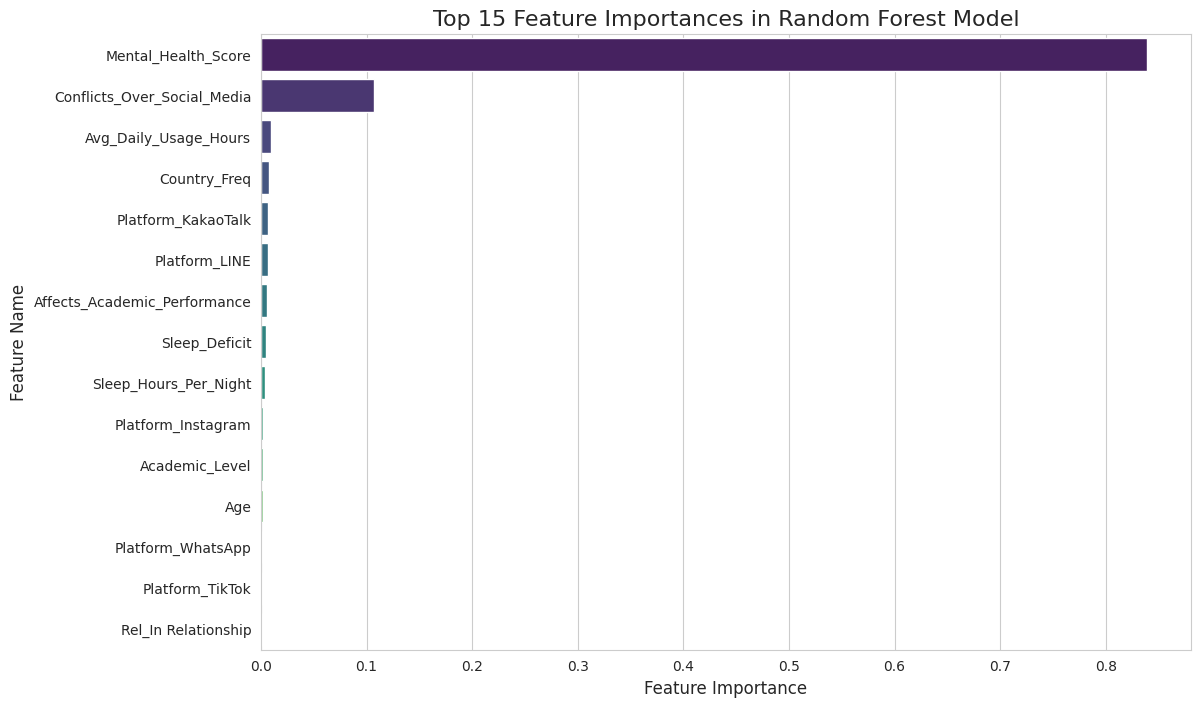

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get feature importances
feature_importances = rf_model.feature_importances_

# 2. Create a Pandas Series with feature importances and X_train column names
# X_train is assumed to be available from Phase 2 execution
feature_names = X_train.columns
importance_series = pd.Series(feature_importances, index=feature_names)

# 3. Sort feature importances in descending order
sorted_importance = importance_series.sort_values(ascending=False)

# Display the top features (optional, but good for quick check)
print("Top 15 Most Important Features:")
print(sorted_importance.head(15))

# 4. Create a bar plot of the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importance.head(15).values, y=sorted_importance.head(15).index, palette='viridis', hue=sorted_importance.head(15).index, legend=False)
plt.title('Top 15 Feature Importances in Random Forest Model', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.show()

## Interpretation of Model Performance Plots




###**Actual vs. Predicted Plot:**
The scatter plot of Actual Addiction Score versus Predicted Addiction Score shows a strong positive linear relationship, with points clustered very closely along the diagonal line. This indicates that the Random Forest model is highly accurate in its predictions across the range of addiction scores. The tight clustering suggests excellent model fit, meaning the predicted values are consistently very close to the true actual values. There are very few points deviating significantly from this diagonal, reinforcing the high R² score observed during evaluation.

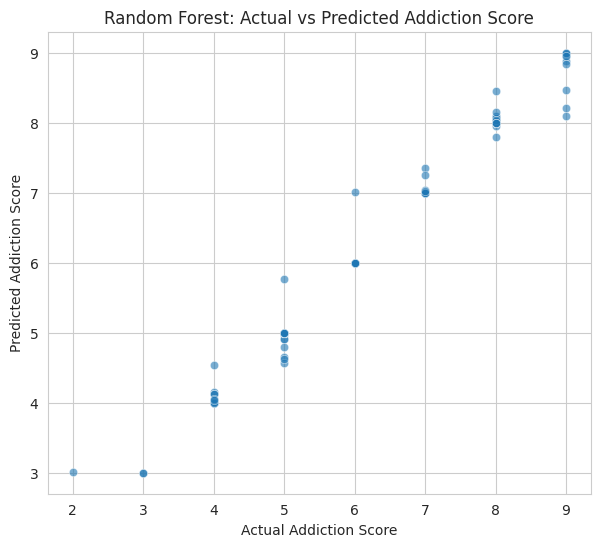

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# rf_model, X_test, and y_test are assumed to be available from previous executions
rf_predictions = rf_model.predict(X_test)

# Plot Actual vs. Predicted
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=rf_predictions, alpha=0.6)
plt.xlabel("Actual Addiction Score")
plt.ylabel("Predicted Addiction Score")
plt.title("Random Forest: Actual vs Predicted Addiction Score")
plt.grid(True)
plt.show()

###**Residual Plot:**

The residual plot, which shows the difference between actual and predicted values, supports the model’s strong performance. Most points are randomly scattered around the zero line, meaning the errors are not biased in any direction. There is no clear pattern (such as a curve or funnel), suggesting the Random Forest model captured the data’s relationships well, including non linear trends. While a bit more spread appears at very low or very high addiction scores, this is minor and only shows slight variability at the extremes. Overall, the model performs reliably.

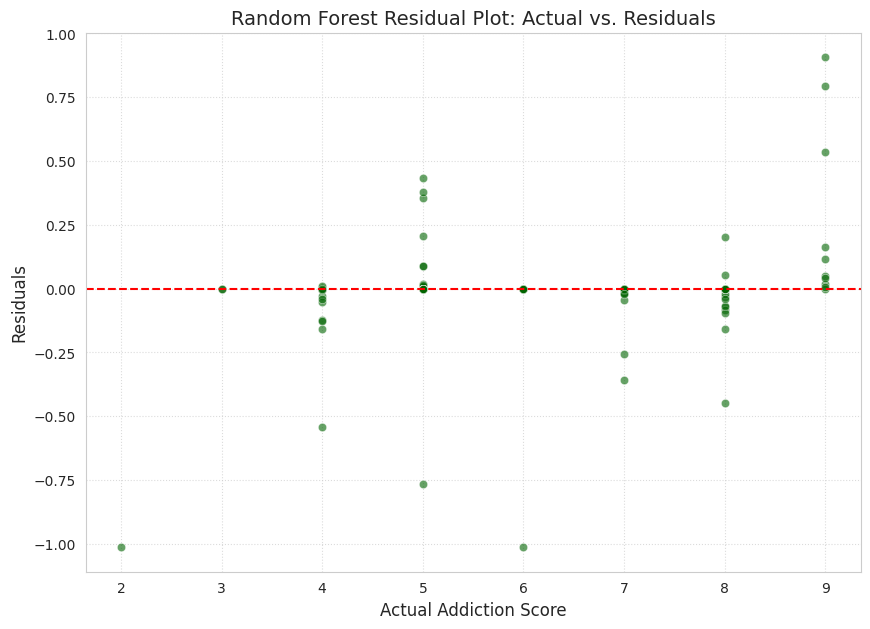

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# rf_predictions and y_test are assumed to be available from the previous cell's execution
residuals = y_test - rf_predictions

# Create a scatter plot for residuals
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6, color='darkgreen')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Label the x-axis, y-axis, and add a title
plt.xlabel('Actual Addiction Score', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Random Forest Residual Plot: Actual vs. Residuals', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

###**Overall Conclusion:**
Both plots confirm that the Random Forest Regressor is a highly effective and reliable model for predicting social media addiction scores. The close alignment of actual and predicted values, coupled with the random distribution of small residuals, demonstrates excellent model fit and a strong ability to generalize. The model is generally accurate across the spectrum of addiction scores, making it a valuable tool for understanding and predicting social media addiction.

## Project Summary

This project successfully developed a highly accurate predictive model for student social media addiction scores. The project involved comprehensive data preparation, including encoding categorical features such as `Gender` and `Academic_Level`, frequency encoding for `Country` to manage high cardinality, and engineering a `Sleep_Deficit` feature. After lots of data processing, the Random Forest Regressor emerged as the optimal model, significantly outperforming a Linear Regression baseline with an impressive R² score of 0.9836, indicating exceptional predictive power and generalization ability.

Interpretation of the Random Forest model's feature importance revealed insights into the drivers of social media addiction. The `Mental_Health_Score` was identified as the overwhelmingly dominant predictor, accounting for approximately 83.9% of the total feature importance, showng off the critical link between psychological well being and addiction. Following this, `Conflicts_Over_Social_Media` was the second most significant factor (10.7% importance), highlighting the impact of social consequences. Notably, `Avg_Daily_Usage_Hours` had a relatively minor impact, suggesting that the qualitative aspects of usage and underlying psychological factors are more crucial than mere screen time.

The residual plots showed that the model’s errors were randomly spread around zero, meaning there was no clear pattern or bias. This confirms that the model is stable and reliable. Overall, the project provides a strong predictive model and useful insights, supporting a mental health focused approach to creating interventions, and support strategies for social media addiction among students.

### Bullet Point Summary:

#### Data Analysis Key Findings

*   The best performing model, a Random Forest Regressor, was successfully loaded from `random_forest_model.pkl`.
*   Feature importance analysis revealed that **Mental\_Health\_Score** is the primary predictor of social media addiction, accounting for approximately 84% of the total importance.
*   **Conflicts\_Over\_Social\_Media** was identified as the second most significant predictor (10.7% importance).
*   **Avg\_Daily\_Usage\_Hours** (screen time) had a comparatively minor impact (less than 1%), suggesting that the *quality* or *context* of social media interaction and underlying psychological factors are more influential than mere screen time.
*   The Random Forest model achieved an impressive R² score of 0.9836, significantly outperforming a Linear Regression baseline, indicating excellent predictive power and generalization capability.
*   Model performance plots (Actual vs. Predicted and Residuals) confirmed the model's robustness and high accuracy:
    *   The Actual vs. Predicted plot showed a strong positive linear relationship with tight clustering along the diagonal, indicating excellent model fit.
    *   The Residual plot displayed errors scattered randomly around the zero line, suggesting no systematic bias and effective capture of underlying relationships.
*   The strong correlation between `Mental_Health_Score` and social media addiction suggests that interventions targeting mental well being could be highly effective in addressing addiction.
*   Given the minor impact of `Avg_Daily_Usage_Hours`, future research or interventions should focus less on raw screen time and more on the psychological factors and social consequences associated with social media use.
